In [1]:
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X = digits.images
y = digits.target

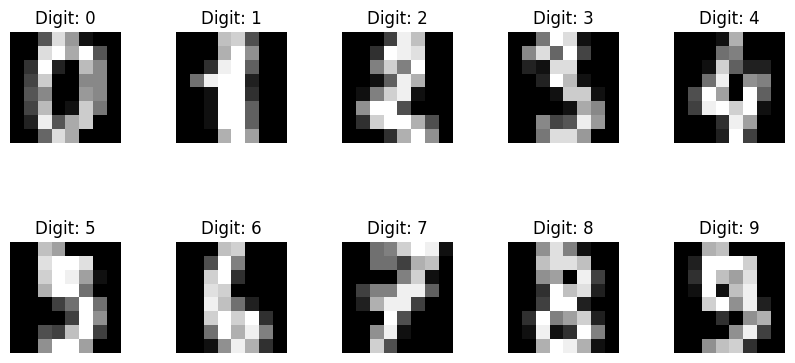

In [2]:
# Plot the first few images
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X[i], cmap='gray')
    axes[i].set_title("Digit: %s" % y[i])
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

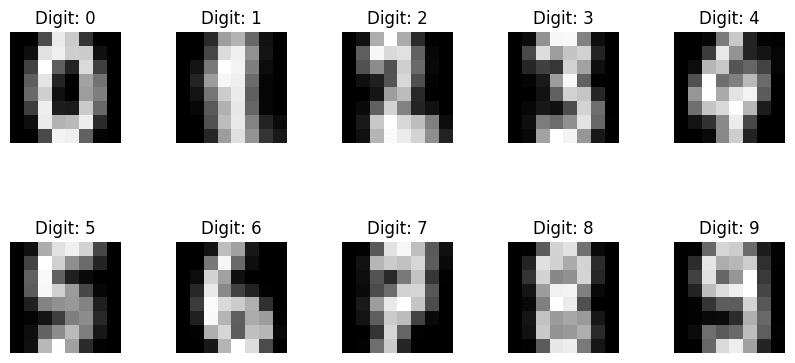

In [3]:
avg_images = np.array([np.mean(X[y == i], axis=0) for i in range(10)])

# Plot average images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(avg_images[i], cmap='gray')
    axes[i].set_title("Digit: %s" % i)
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

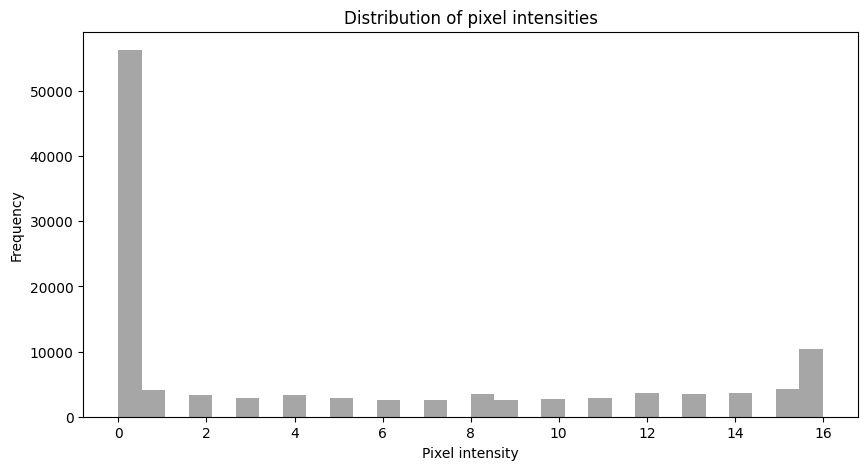

In [4]:
# Reshape X to 2D
X_2D = X.reshape(X.shape[0], -1)

# Histogram of pixel intensities
plt.figure(figsize=(10, 5))
plt.hist(X_2D.ravel(), bins=30, color='gray', alpha=0.7)
plt.title("Distribution of pixel intensities")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Load data
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [10]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.9881629887727449


In [11]:
knn_best = KNeighborsClassifier(**grid_search.best_params_)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

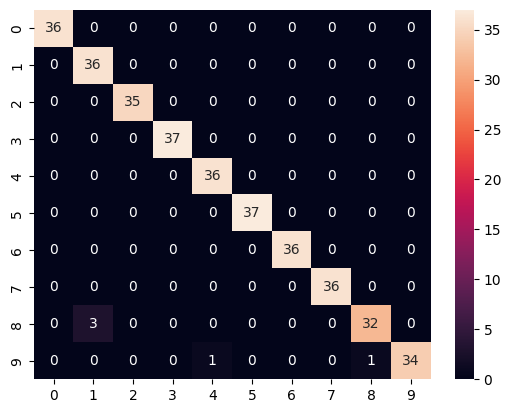

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = knn_best.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()

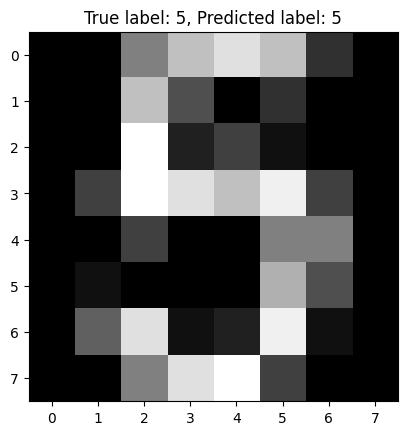

In [15]:
# Send a testing image to the model, get prediction, and visualize it
test_image_index = 0
test_image = X_test[test_image_index]
test_image_label = y_test[test_image_index]
test_image_pred = knn_best.predict(test_image.reshape(1, -1))

plt.imshow(test_image.reshape(8, 8), cmap='gray')
plt.title(f"True label: {test_image_label}, Predicted label: {test_image_pred[0]}")
plt.show()